# **Model that predicts which passengers would have survived Titanic shipwreck.**

## **1. Problem definition**

Create model that can use dataset from kaggle to predict if passengers survived (1) or didnt survie (0) the famous Titanic shipwreck

## **2. Download data**
Data are downloaded from Kaggle Competition here:

https://www.kaggle.com/c/titanic/overview

## **3. Evaluation**

> Goal is to get atleast 70% accuracy (Got 73.6%)

## **4. Features**

* **PassengerId** - ID 1 to ...
* **Survival** - 0 = No, 1 = Yes
* **Pclass** - Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* **Sex** - male = 0, female = 1
* **Name** - Name of a passenger
* **Age**  - Age in years	
* **Sibsp**	- # of siblings / spouses aboard the Titanic	
* **Parch**	- # of parents / children aboard the Titanic	
* **Ticket** - Ticket number	
* **Fare** - Passenger fare	
* **Cabin** - Cabin number	
* **Embarked** - Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### **Importing all the modules and data we need**

In [ ]:
# Import all the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create magic function so that our plots are displayed in jupyter notebook
%matplotlib inline

# Scikit-Learn models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression

# Scikit-Learn model evaluation modules
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve

In [ ]:
# Import all the data we need
df_train = pd.read_csv("/content/drive/My Drive/ML_Projects/Titanic/data/train.csv")
df_test = pd.read_csv("/content/drive/My Drive/ML_Projects/Titanic/data/test.csv")
df_submission_example = pd.read_csv("/content/drive/My Drive/ML_Projects/Titanic/data/gender_submission.csv")

In [ ]:
# View first 3 rows of our train data
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# View first 3 rows of our test data
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [ ]:
# View first 3 rows of our gender_submission example
df_submission_example.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [ ]:
# Make copy of our train data and save it to tmp dataframe
df_train_tmp = df_train.copy()

In [ ]:
# Number of rows our data has
len(df_train_tmp)

891

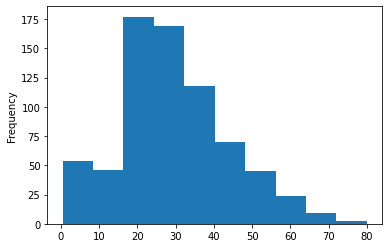

In [ ]:
# Frequency of Age in our dataset
df_train_tmp["Age"].plot.hist();

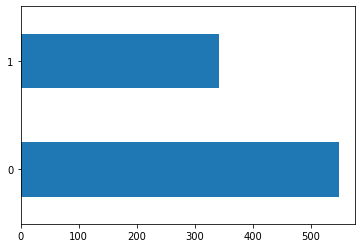

In [ ]:
# Plot a value of people who did and did not survive
df_train_tmp["Survived"].value_counts().plot.barh();

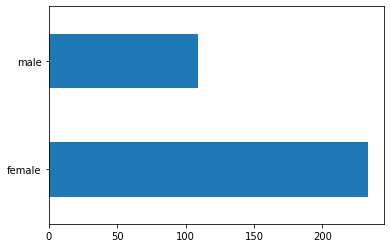

In [ ]:
# What sex had better survive rate
df_train_tmp["Sex"][df_train_tmp["Survived"] == 1].value_counts().plot.barh();

### **Preprocessing Data**

In [ ]:
df_train_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train_tmp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_train_tmp.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [ ]:
for column_name, content in df_train_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(column_name)

Name
Sex
Ticket
Cabin
Embarked


In [ ]:
for column_name, content in df_train_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(column_name)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [ ]:
len(df_train_tmp)

891

In [ ]:
df_train_tmp["Ticket"].value_counts()

347082               7
CA. 2343             7
1601                 7
CA 2144              6
347088               6
                    ..
PP 4348              1
C 17369              1
STON/O 2. 3101273    1
PC 17483             1
112050               1
Name: Ticket, Length: 681, dtype: int64

In [ ]:
681 / 891 * 100

76.43097643097643

In [ ]:
df_train_tmp["Cabin"].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
C22 C26        3
              ..
E58            1
D21            1
A24            1
D11            1
C128           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df_train_tmp["Name"].value_counts()

Yasbeck, Mr. Antoni                1
Crosby, Capt. Edward Gifford       1
Icard, Miss. Amelie                1
Palsson, Miss. Torborg Danira      1
Asplund, Miss. Lillian Gertrud     1
                                  ..
Hodges, Mr. Henry Price            1
Coelho, Mr. Domingos Fernandeo     1
Gustafsson, Mr. Karl Gideon        1
Hoyt, Mr. Frederick Maxfield       1
Hagland, Mr. Ingvald Olai Olsen    1
Name: Name, Length: 891, dtype: int64

In [ ]:
df_train_tmp["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### **Function to preprocess our data to be ready for modeling**

In [ ]:
# Create a function to preprocess given dataframe
def preprocess_data(df):
  # Drop "Name" column because every name is unique and also we have PassengerID connected with name
  df.drop("Name", axis=1, inplace=True)
  # Drop missing values in "Embarked" column since its only 2 rows
  df["Embarked"].dropna(inplace=True)
  # Drop "Ticket" column because more then 75% rows has unique value
  df.drop("Ticket", axis=1, inplace=True)
  # Drop "Cabin" column since it is mostly filled with missing values
  df.drop("Cabin", axis=1, inplace=True)
  # Fill missing values in "Age" column with mean (average) value
  df.fillna(df["Age"].mean(), inplace=True)
  # Replace male with value of 0 and female with value of 1
  df["Sex"].replace({"male": 0, "female": 1}, inplace=True)
  # Replace S with 1, C with 2, Q with 3, since we have only 3 different values
  df["Embarked"].replace({"S": 1, "C": 2, "Q": 3}, inplace=True)

  return df


In [ ]:
df_train_tmp = preprocess_data(df_train_tmp)

In [ ]:
df_train_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [ ]:
df_train_tmp.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
len(df_train_tmp)

891

## **5. Modeling**

Try which model with what hyperparameters works best

In [ ]:
# Create dictionary with every model that will be tested
models = {
    "RandomForest": RandomForestClassifier(),
    "LinearSVC:": LinearSVC(),
    "SVC": SVC(),
    "KNeighbors": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression()
}

# Create function for trying our test models
def train_and_score(models, df, target):
  """
  Function that takes models dictionary
  and dataframe and returns score
  """
  # Set random seed
  np.random.seed(42)
  # Split into X and y
  X = df.drop(target, axis=1)
  y = df[target]
  # Split the data to training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  # Create score dict that will be returned with the score of each model
  score = {}
  # Loop throw models dict
  for name, clf in models.items():
    clf.fit(X_train, y_train)
    score[name] = clf.score(X_test, y_test)
  # Return score dict
  return score

In [ ]:
# Run function with our models dict, dataframe and target variable
scores = train_and_score(models, df_train_tmp, "Survived")

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Look how models scored on df_train_tmp dataframe
scores

{'KNeighbors': 0.664804469273743,
 'LinearSVC:': 0.7262569832402235,
 'LogisticRegression': 0.7932960893854749,
 'RandomForest': 0.8156424581005587,
 'SVC': 0.5977653631284916}

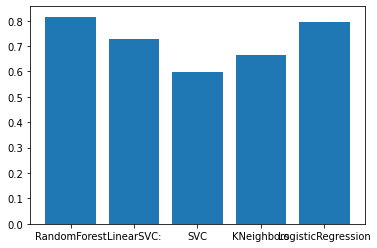

In [ ]:
# Plot score value of every model that was tested
fig, ax = plt.subplots()
ax.bar(scores.keys(), scores.values());

### **Tuning hyperparameters**

Tuning hyperparameters with RandomForestClassifier() and LogisticRegression() models

In [ ]:
# Create RandomForestClassifier grid for RandomizedSerchCV
rf_grid = {
    "n_estimators": [10, 100, 200, 400, 500, 1000, 2000, 2500],
    "max_depth": [None, 3, 5, 8, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

# Create LogisticRegression grid for RandomizedSerchCV
lr_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["lbfgs", "liblinear"]
}

In [ ]:
# Find how many possible combianations is there
print(f"rf_grid: {8 * 5 * 9 * 10 * 5}")
print(f"lr_grid: {20 * 2 * 5}")

rf_grid: 18000
lr_grid: 200


#### **Finding best hyperparameters for RandomForestClassifier with RandomizedSearchCV**

In [ ]:
# Function for finding best hyperparameters with RandomizedSearchCV
def best_params(X_train, y_train, model, grid, n_iter):
  """
  Function that takes X_train,
  y_train, model, grid variable 
  and number of n_iter and returns 
  model best hyperparameters
  """
  # Set random seed
  np.random.seed(42)
  # Setup random parameters for RandomForestClassifier
  clf = RandomizedSearchCV(model, 
                          param_distributions=grid, 
                          n_iter=n_iter,
                          n_jobs=-1,
                          cv=5,
                          verbose=True)
  # Fit the model
  clf.fit(X_train, y_train)
  # Return trained model with best hyperparameters
  return clf

In [ ]:
  # Set random seed
  np.random.seed(42)
  # Split data into X and y
  X = df_train_tmp.drop("Survived", axis=1)
  y = df_train_tmp["Survived"]
  # Split data into train and test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
%%time
# Train model with 500 different hyperparameters (100 * 5)
rf_clf = best_params(X_train, y_train, RandomForestClassifier(), rf_grid, 100)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.9min finished


CPU times: user 3.69 s, sys: 89.4 ms, total: 3.78 s
Wall time: 8min 54s


In [ ]:
# Show best hyperparameters on RandomForestClassifier model
rf_clf.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'n_estimators': 400}

In [ ]:
# Score trained model with best hyperparameters
rf_clf.score(X_test, y_test)

0.8100558659217877

### **Finding best hyperparameters for LogisticRegression with RandomizedSearchCV**

In [ ]:
%%time
# Train model with 200 different hyperparameters (40 * 5)
lr_clf = best_params(X_train, y_train, LogisticRegression(), lr_grid, 40)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


CPU times: user 400 ms, sys: 5.87 ms, total: 406 ms
Wall time: 3.23 s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Show best hyperparameters on LogisticRegression model
lr_clf.best_params_

{'C': 0.08858667904100823, 'solver': 'lbfgs'}

In [ ]:
# Score trained model with best hyperparameters
lr_clf.score(X_test, y_test)

0.8100558659217877

**Since both models are same im gonna try to use RandomizedSearchCV for my RandomForestClassifier with more iterations**

In [ ]:
%%time
# Train model with 2000 different hyperparameters (400 * 5)
rf_clf = best_params(X_train, y_train, RandomForestClassifier(), rf_grid, 400)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 36.1min finished


CPU times: user 14.5 s, sys: 254 ms, total: 14.8 s
Wall time: 36min 11s


In [ ]:
# Show best hyperparameters on RandomForestClassifier model
rf_clf.best_params_

{'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 2000}

In [ ]:
# Score trained model with best hyperparameters
rf_clf.score(X_test, y_test)

0.8100558659217877

**Tuning hyperparameters didnt help, so Im going to use default hyperparameters with RandomForestClassifier model**

In [ ]:
# Setup random seed
np.random.seed(42)

# Initialize model and fit the data
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Score the data
clf.score(X_test, y_test)

0.8212290502793296

In [ ]:
# Create variable with predictions made on test set
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0])

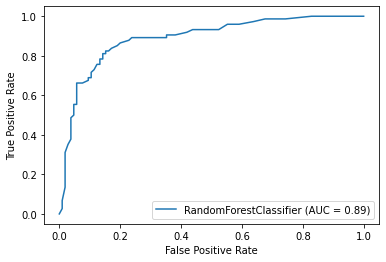

In [ ]:
# plot ROC curve
plot_roc_curve(clf, X_test, y_test);

In [ ]:
# Create confusion matrix
confusion_matrix(y_test, y_preds)

array([[93, 12],
       [20, 54]])

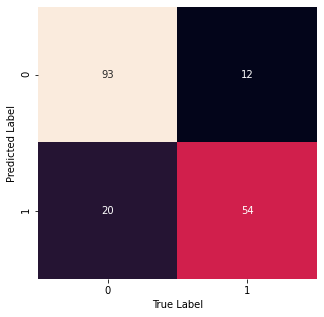

In [ ]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
            annot=True,
            cbar=False)
plt.xlabel("True Label")
plt.ylabel("Predicted Label");

In [ ]:
# Show importances of our feature variables
clf.feature_importances_

array([0.19252165, 0.08277753, 0.25416386, 0.17073123, 0.04452509,
       0.03287461, 0.19033622, 0.03206981])

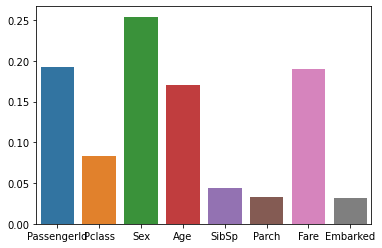

In [ ]:
# Plot which feature is most important for our model
sns.barplot(X_train.columns, clf.feature_importances_);

In [ ]:
# Print classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### **Function that prints and plots metrics on given model**

In [ ]:
# Create function that will print and plot metrics on given model
def plot_metrics(model, X, y):
  """
  Function that prints and plots
  accuracy, precision, recall 
  and f1 metrics on given model
  """
  # Set random seed
  np.random.seed(42)
  # variable with scoring parameters 
  scorings = ["accuracy", "precision", "recall", "f1"]
  # variable that will contain all metrics
  metrics = []

  # loop throw scorings variable
  for scoring in scorings:
    # append 
    metrics.append(cross_val_score(model, X, y, scoring=scoring).mean())

  for i in range(len(scorings)):
    print(f"{scorings[i]}: {metrics[i]}")

  sns.barplot(scorings, metrics)

accuracy: 0.8070742577364886
precision: 0.7955770264681555
recall: 0.6292412617220802
f1: 0.6984876716954035


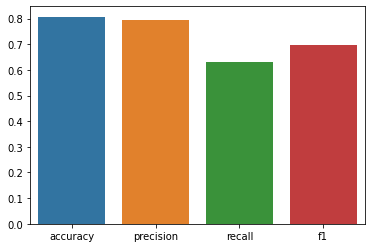

In [ ]:
# Use our function to print and plot metrics on our model
plot_metrics(clf, X, y)

## **6. Make predictions**

Since we selected model that gave us best scores, we will now use that model on given test dataframe

1. Retrain model with 100% of train dataframe
2. Preprocess test dataframe
3. Make predictions on test dataframe
4. Save predictions into csv file
5. Submit csv file with our predictions on Kaggle

In [ ]:
# Retrain model with 100% of train dataframe

# Set random seed
np.random.seed(42)

# Create X and y
X = df_train_tmp.drop("Survived", axis=1)
y = df_train_tmp["Survived"]

# Initialize model
clf = RandomForestClassifier()
clf.fit(X, y);

In [ ]:
# Use preprocess function on test dataframe
df_test_tmp = preprocess_data(df_test)

In [ ]:
# Making predictions on preprocessed dataframe
y_test_preds = clf.predict(df_test_tmp)
y_test_preds[:20]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
# Show first 5 rows
df_submission_example.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# Create empty dataframe
df_submission = pd.DataFrame()
# Create PassengerId column
df_submission["PassengerId"] = df_test["PassengerId"]
# Create column with predictions
df_submission["Survived"] = y_test_preds

In [ ]:
# Show first 5 rows of submission dataframe
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [ ]:
# Convert submission dataframe into .csv file
df_submission.to_csv("/content/drive/My Drive/ML_Projects/Titanic/submission.csv", index=False)